In [33]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time

In [2]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [3]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [7]:
lfw.data.shape

(1140, 1850)

In [ ]:
lf

In [8]:
lfw.images.shape

(1140, 50, 37)

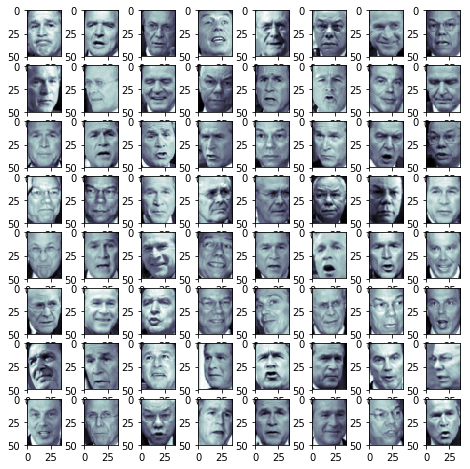

In [19]:
fig=plt.figures(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)
plt.show()

In [24]:
x,y=lfw.data,lfw.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
pca_oliv=PCA()
pca_oliv.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
k=0
total=0
while total<0.99:
    total=total+pca_oliv.explained_variance_ratio_[k]
    k=k+1
k

316

In [26]:
pca_lfw=PCA(n_components=k,whiten=True)
x_transformed=pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 316)

In [27]:
x_approx=pca_lfw.inverse_transform(x_transformed)
x_approx=x_approx.reshape((855,50,37))

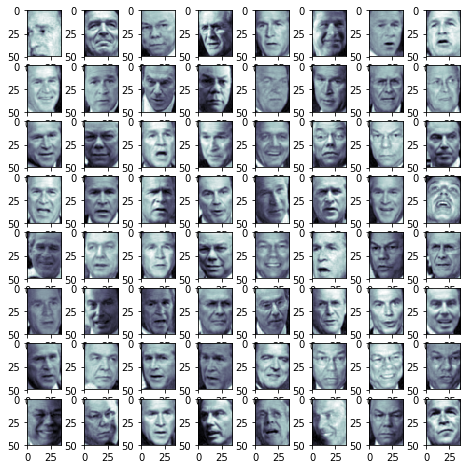

In [28]:
fig=plt.figures(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i)
    ax.imshow(x_approx[i],cmap=plt.cm.bone)
plt.show()

In [30]:
eigenv=pca_oliv.components_.reshape(855,50,37)

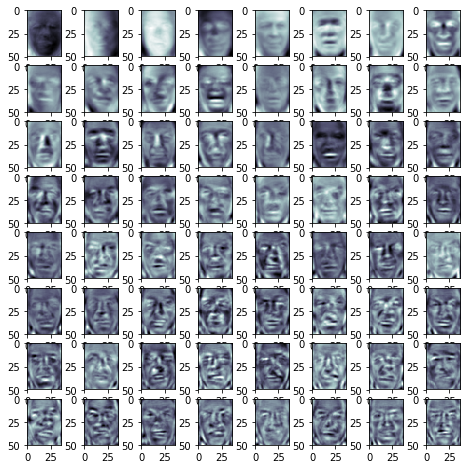

In [31]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigenv[i],cmap=plt.cm.bone)
plt.show()

In [32]:
x_train_pca=x_transformed
x_test_pca=pca_lfw.transform(x_test)

In [37]:
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

#We are getting more results for class 2 images and also in confusion matrix, class 4 images has been classified as class 2 images.
#as class 2 images are more frequent in the dataset.

C:\Users\ROHAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.15560483932495117
              precision    recall  f1-score   support

           0       0.60      0.67      0.64        61
           1       0.52      0.31      0.39        36
           2       0.60      0.85      0.71       122
           3       0.62      0.16      0.26        31
           4       0.44      0.20      0.27        35

   micro avg       0.59      0.59      0.59       285
   macro avg       0.56      0.44      0.45       285
weighted avg       0.58      0.59      0.55       285

[[ 41   1  18   0   1]
 [  9  11  15   0   1]
 [  8   5 104   1   4]
 [  4   1  18   5   3]
 [  6   3  17   2   7]]


In [38]:
#On PCA tranformed data
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

#This time,it's taking lesser time.Also precision has fallen down from 0.59 to 0.49.

0.08373641967773438
              precision    recall  f1-score   support

           0       0.47      0.51      0.49        61
           1       0.31      0.14      0.19        36
           2       0.55      0.82      0.66       122
           3       0.38      0.10      0.15        31
           4       0.15      0.06      0.08        35

   micro avg       0.49      0.49      0.49       285
   macro avg       0.37      0.32      0.32       285
weighted avg       0.43      0.49      0.44       285

[[ 31   5  24   1   0]
 [ 12   5  17   1   1]
 [ 12   2 100   1   7]
 [  3   2  20   3   3]
 [  8   2  21   2   2]]


C:\Users\ROHAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
